# 08.02.20

**Author:** Miron Rogovets

---

### Task 1. Chi-square test. Use data_games.dta file.

**1.1.** Analyze the relationship between **payment_type** and **payment_method** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [32]:
df = pd.read_stata('data/data_games.dta')
df.head()

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general


To test whether variables _payment_type_ and _payment_method_ are associated we define the following hypothesis:

**H0:** The variables _payment_type_ and _payment_method_ are **independent**

**H1:** The variables _payment_type_ and _payment_method_ are **not independent**

We also choose a significance level $\alpha$ **= 0.05**

In [33]:
tab = pd.crosstab(df.payment_type, df.payment_method)
tab

payment_method,fb_promotion,general,giftcard,mobile
payment_type,,,,
offer,0,13538,0,301
regular,498,89740,58,1372


In [34]:
alpha = 0.05
stat, p, dof, expected = chi2_contingency(tab)

In [35]:
print('significance=%f, p=%f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050000, p=0.000000
Variables are associated (reject H0)


In [36]:
stacked = tab.stack().reset_index().rename(columns={0:'value'})
stacked

,payment_type,payment_method,value
0,offer,fb_promotion,0
1,offer,general,13538
2,offer,giftcard,0
3,offer,mobile,301
4,regular,fb_promotion,498
5,regular,general,89740
6,regular,giftcard,58
7,regular,mobile,1372


**1.2.** Analyze the relationship between **payment_type** and **crystalls_balance_before_buy** using Chi-square statistical test. Is the Chi-square test applicable for this pair of variables? If yes, formulate hypotheses, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between these two variables.

In [15]:
tab = pd.crosstab(df.crystalls_balance_before_buy, df.payment_type)
tab

payment_type,offer,regular
crystalls_balance_before_buy,,
0.0,4047,28833
1.0,2250,13951
2.0,1287,9337
3.0,919,6221
4.0,649,5159
...,...,...
6439.0,1,0
6453.0,1,0
6528.0,0,1


---

### Task 2. Scatterplot. Normality test. Correlation. Use data_games.dta file.

**2.1.** Create a scatterplot between **crystalls_balance_before_buy** and **payment**. Copy the scatterplot into this file.

Populating the interactive namespace from numpy and matplotlib


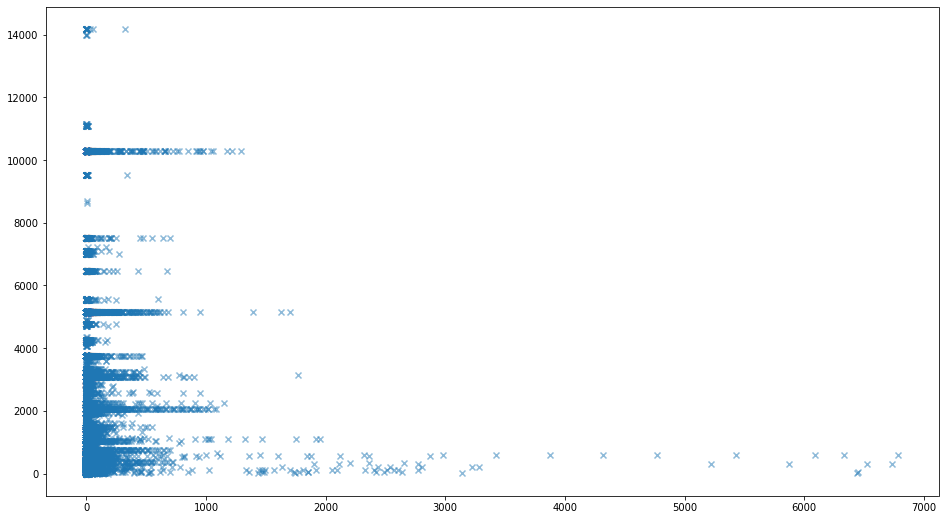

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("data/data_games.dta")

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

plt.scatter(data.crystalls_balance_before_buy, data.payment, marker = "x", alpha = 0.5)
plt.show()

**2.2.** Run the suitable normality test to conclude whether the distribution of **payment** variable is significantly different from the normal. Formulate hypothesis. Make conclusions.

In [6]:
print(len(data.payment))

105507


The sample's size is much greater than 100.
Since, Shapiro-Wilks test is not suitable for current test. 

We are to use **Kolmogorov-Smirnov normality test**

H0: Distribution of variable `payment` is not significantly different from normal distribution.

H1: Distribution of variable `payment` is significantly different from normal distribution.

In [9]:
from scipy.stats import kstest

print("p-value of Kolmogorov-Smirnov normality test equals = {}".format(kstest(data.payment, 'norm').pvalue))

p-value of Kolmogorov-Smirnov normality test equals = 0.0


As p-value = 0.0 we reject the null hypothesis and conclude that values of `payment` variable do not follow the normal distribution.

Calculate an appropriate correlation coefficient between three pairs of variables. Fill in the table below. Interpret the results.


| Variables | Type of the appropriate correlation coefficient | Hypotheses | Strength of the relationship | Direction of the relationship | Significance of the relationship |
|:---|:---:|:---:|:---:|:---:|:---:|
| crystalls_balance_before_buy and payment | Spearman   | H0: these variables are independent  | Very weak  | Positive  | 0.01  |
| crystalls_balance_before_buy and crystalls_bought | Kendall  | H0: these variables are independent  | Very weak  | Positive  |  0.01 |
| crystalls_bought and payment | Pearson  | H0: these variables are independent  | Strong  | Positive  |  0.01 |

Populating the interactive namespace from numpy and matplotlib


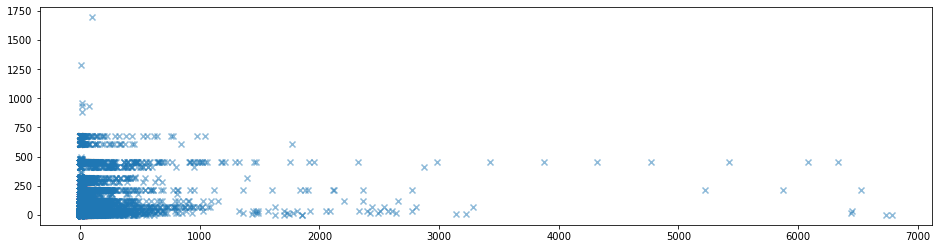

In [28]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 4)

plt.scatter(data.crystalls_balance_before_buy, data.crystalls_bought, marker = "x", alpha = 0.5)

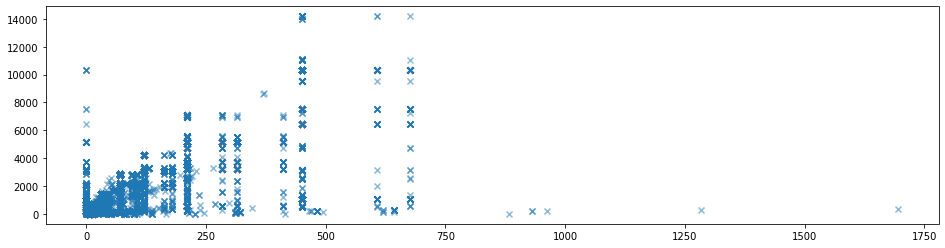

In [29]:
plt.scatter(data.crystalls_bought, data.payment, marker = "x", alpha = 0.5)
plt.show()

From the plot we can see that:
* `crystalls_balance_before_buy and payment` distributed ordinarly and has quite significant number of ranks -> Spearman's correlation is applicable for this case
* `crystalls_balance_before_buy and crystalls_bought` distributed ordinarly and ranks are tied closely -> Kendalls's correlation can be used here
* `crystalls_bought and payment` distributed ordinarly, but the number of ranks is quite the same -> Kendalls's correlation can be used here, but the Pearson's correlation also can be implemented as we can see some kind of linear relation between them. So that, let's use it here

In [45]:
from scipy.stats import pearsonr, spearmanr, kendalltau

corr_1 = spearmanr(data.crystalls_balance_before_buy, data.payment)
print("Spearman correlation = {}, p-value = {}".format(corr_1[0], corr_1[1]))

corr_2 = kendalltau(data.crystalls_balance_before_buy, data.crystalls_bought)
print("Kendal correlation = {}, p-value = {}".format(corr_2[0], corr_2[1]))

corr_3 = pearsonr(data.crystalls_bought, data.payment)
print("Pearson correlation = {}, p-value = {}".format(corr_3[0], corr_3[1]))

Spearman correlation = 0.1457859347733024, p-value = 0.0
Kendal correlation = 0.11117243493392964, p-value = 0.0
Pearson correlation = 0.85114580317308, p-value = 0.0


---

### Task 3. Partial correlation. Use health_funding.dta file.

Calculate paired correlation coefficient between **funding** and **disease** variables. Now calculate the correlation coefficient between the same pair of variables controlling for the number of visits (**visits** variable). Interpret the results of analysis.

---

### Task 4. T-tests and Nonparametric tests.

**4.1.** Use **auto.dta** file (example datasets). Select an appropriate test to check if there is a difference in the mean length of foreign and non-foreign cars. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

**4.2.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment types. Explain you selection. Formulate the hypotheses. Interpret the results of analysis. 

**4.3.** Use **data_games.dta** file. Select an appropriate test to understand whether there is a difference in payments between the people who have used different payment methods. Explain you selection. Formulate the hypotheses. Interpret the results of analysis.